# Time Series Forecasting Exam

In this exam, you will work on a time series forecasting task. The goal is to go through the entire workflow from loading the data to evaluating the model and making predictions. Follow each step carefully. The dataset is stored in you can access it [here](https://www.kaggle.com/datasets/khaledzsa/traffic-dataset), the target is to predict `traffic_volume` column. There is also command to download the dataset below.

## Dataset: Traffic Dataset

### Dataset Overview:

- **Name**: Traffic Dataset
- **Description**: This dataset contains hourly data on the traffic volume for westbound I-94, a major interstate highway in the US that connects Minneapolis and St Paul, Minnesota. The data was collected by the Minnesota Department of Transportation (MnDOT) from 2012 to 2018 at a station roughly midway between the two cities.
- **Time Period**: Starting from 18-11-2016
- **Frequency**: Hourly observations

### Features:

1. **temp:** a numeric variable that shows the average temperature in kelvin.
2. **rain_1h:** a numeric variable that shows the amount of rain in mm that occurred in the hour.
3. **snow_1h:** a numeric variable that shows the amount of snow in mm that occurred in the hour.
4. **clouds_all:** a numeric variable that shows the percentage of cloud cover.
5. **weather_main:** a categorical variable that gives a short textual description of the current weather (such as Clear, Clouds, Rain, etc.).
6. **weather_description:** a categorical variable that gives a longer textual description of the current weather (such as light rain, overcast clouds, etc.).
7. **date_time:** a datetime variable that shows the hour of the data collected in local CST time.
8. **traffic_volume:** a numeric variable that shows the hourly I-94 reported westbound traffic volume.

#### Feel free to add or rearrange steps as you see fit to optimize your workflow. One additional note: the model's performance doesn't need to be 100% accurate. Instead, focus on achieving the best possible results while balancing performance and generalization.

## Load the Data

Load the time series dataset into a pandas DataFrame.

**Instructions:**
- Use `pandas` to load your dataset.
- Display the first few rows to understand its structure.
- Make sure the datetime column is correctly parsed.

In [ ]:
# Here is a helping code that will download and unzip the dataset for you.
# Once you download the dataset you may comment the code!
!kaggle datasets download -d khaledzsa/traffic-dataset
!unzip traffic-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/khaledzsa/traffic-dataset
License(s): unknown
  0% 0.00/235k [00:00<?, ?B/s]
100% 235k/235k [00:00<00:00, 73.4MB/s]
Archive:  traffic-dataset.zip
  inflating: Traffic Data.csv        


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/Traffic Data.csv', parse_dates=['date_time'], index_col=['date_time'])
df.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description
date_time,,,,,,,
2017-08-27 01:00:00,1209.0,291.15,0.0,0.0,90,Mist,mist
2018-09-06 23:00:00,1248.0,286.01,0.0,0.0,1,Clear,sky is clear
2017-08-25 18:00:00,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds
2017-11-09 22:00:00,2838.0,262.35,0.0,0.0,1,Clear,sky is clear
2017-11-09 15:00:00,5794.0,267.08,0.0,0.0,5,Clear,sky is clear


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20000 entries, 2017-08-27 01:00:00 to 2018-05-31 18:00:00
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   traffic_volume       19980 non-null  float64
 1   temp                 20000 non-null  float64
 2   rain_1h              20000 non-null  float64
 3   snow_1h              20000 non-null  float64
 4   clouds_all           20000 non-null  int64  
 5   weather_main         20000 non-null  object 
 6   weather_description  20000 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 1.2+ MB


## Exploratory Data Analysis (EDA)

Perform exploratory data analysis on the dataset.

**Instructions:**
- Plot the time series data.
- Analyze trends, seasonality, and potential outliers.
- Plot boxplots or scatter plots to identify any outliers or anomalies in the data.
- Seasonal Decomposition: Use `seasonal_decompose` from the `statsmodels` library to break down the time series data into trend, seasonality, and residual components. Analyze each component to gain insights into the long-term movement (trend), regular patterns (seasonality), and remaining fluctuations (residuals).

Do more if needed!

In [4]:
df.isnull().sum()

,0
traffic_volume,20
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0


In [5]:
df['traffic_volume'].fillna(df['traffic_volume'].rolling(window=6,min_periods=1).mean(),inplace= True)

In [6]:
df.isnull().sum()

,0
traffic_volume,0
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0


In [7]:
df.sort_index(inplace=True)

<Axes: xlabel='date_time'>

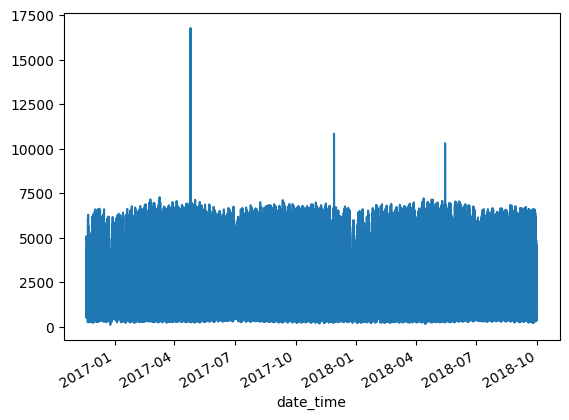

In [8]:
df['traffic_volume'].plot()

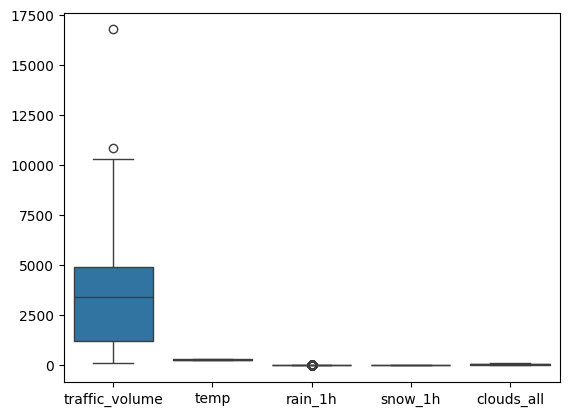

In [9]:
sns.boxplot(df)
plt.show()

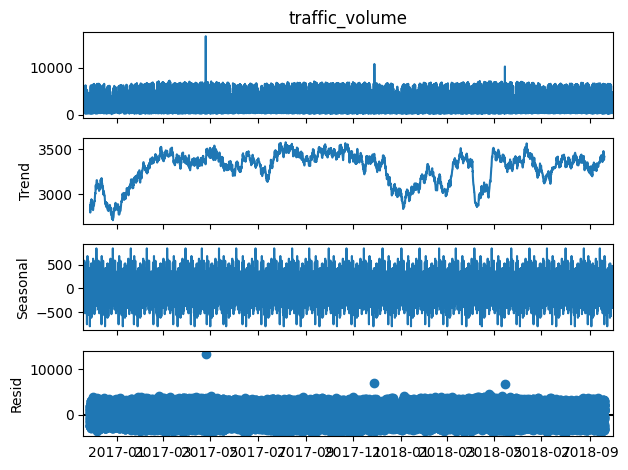

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['traffic_volume'], model='additive', period=672)
result.plot()
plt.show()

## Data Preprocessing

Clean and preprocess the data.

**Instructions:**
- Handle any missing values in the dataset.
- If necessary, resample the data to ensure consistent time intervals.
- Create any additional features needed, such as lags or moving averages.
- Make sure that the dates are sorted correctly.

Do more if needed!

In [11]:
df.isnull().sum()

,0
traffic_volume,0
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0


In [12]:
df.columns

Index(['traffic_volume', 'temp', 'rain_1h', 'snow_1h', 'clouds_all',
       'weather_main', 'weather_description'],
      dtype='object')

In [13]:
df_n = df[['traffic_volume', 'temp', 'rain_1h', 'snow_1h', 'clouds_all']]

In [14]:
for col in df_n.columns:

  Q1 = df_n[col].quantile(0.25)
  Q3 = df_n[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  outliers = df_n[(df_n[col] < lower_bound) | (df_n[col] > upper_bound)]

  Q1 = df_n[col].quantile(0.25)
  Q3 = df_n[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]


  median_value = df_n[col].median()
  df[col] = df[col].apply(lambda x: median_value if x < lower_bound or x > upper_bound else x)

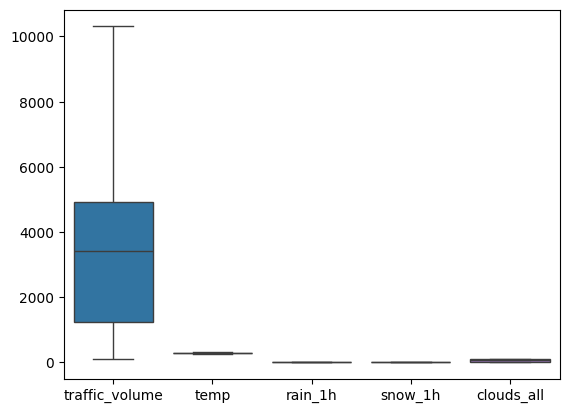

In [15]:
sns.boxplot(df)
plt.show()

In [16]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['weather_main'] = le.fit_transform(df['weather_main'])
df['weather_description'] = le.fit_transform(df['weather_description'])


In [17]:
df.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description
date_time,,,,,,,
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,8,9
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,3,4
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,5,16
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,3,4
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,5,16


In [18]:
#yes it needs to be ressemble scince the plots is composed
df = df.resample('D').mean()


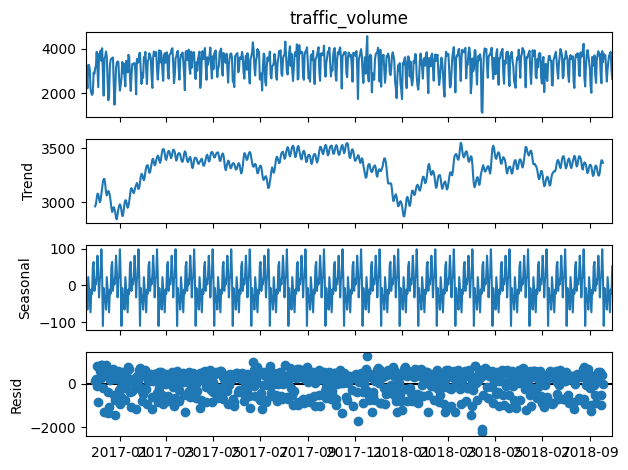

In [19]:
#now the plot are much clearer and readable
result = seasonal_decompose(df['traffic_volume'], model='additive', period=24)
result.plot()
plt.show()

In [20]:
df.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description
date_time,,,,,,,
2016-11-18,3397.000000,273.582500,0.0,0.0,85.000000,6.000000,12.050000
2016-11-19,2710.333333,271.048333,0.0,0.0,53.666667,2.708333,16.375000
2016-11-20,2231.500000,269.565000,0.0,0.0,36.500000,0.541667,17.416667
2016-11-21,3265.666667,271.654583,0.0,0.0,6.041667,0.125000,24.750000
2016-11-22,3273.807692,274.069423,0.0,0.0,81.442308,5.365385,15.519231


In [21]:
#second try
df['traffic_volume_lag1'] = df['traffic_volume'].shift(1)
df['traffic_volume_lag2'] = df['traffic_volume'].shift(2)


In [ ]:
df['traffic_volume_ma7'] = df['traffic_volume'].rolling(window=7).mean()
df['traffic_volume_ma30'] = df['traffic_volume'].rolling(window=30).mean()

In [22]:
df.sort_index(inplace=True)

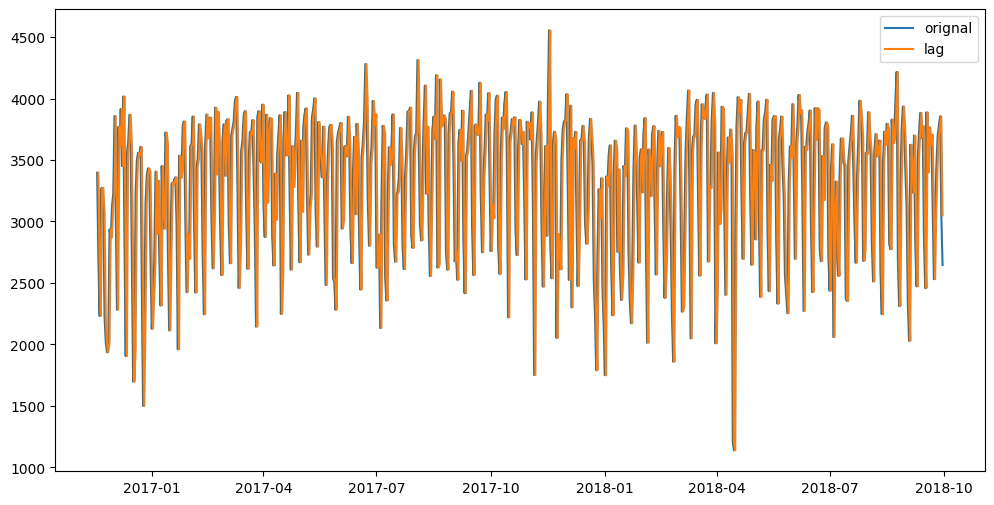

In [26]:
plt.figure(figsize=(12,6))
plt.plot(df['traffic_volume'], label='orignal')
plt.plot(df['traffic_volume_lag1'], label='lag')
plt.legend()
plt.show()

## Feature Engineering

### Instructions:
  
- **Shift Method**: Use the `shift` method to create a new column `prev_traffic_volume`, which represents the previous day's traffic volume.

- **Difference between traffic_volume**: Calculate the difference between the values in `traffic_volume` column to highlight short-term volume.

- **Date Features**: Extract meaningful time-based features from the `date_time` column to enhance the model's ability to detect temporal patterns. These features include:
  - **Day of the week**: To capture weekly seasonality.
  - **Month**: To capture monthly trends.
  - **Day of the year**: Useful for modeling yearly seasonality.


In [27]:
df['prev_traffic_volume'] = df['traffic_volume'].shift(1)


In [28]:
df['diff_traffic_volume'] = df['traffic_volume'].diff()

In [29]:
df['day_of_week'] = df.index.dayofweek
df['month'] = df.index.month
df['Day of the year'] = df.index.dayofyear

In [30]:
df.isnull().sum()

,0
traffic_volume,0
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0
traffic_volume_lag1,1
traffic_volume_lag2,2
prev_traffic_volume,1


## Train-Test Split

Split the dataset into training and testing sets.

**Instructions:**
- Ensure the split maintains the time order of the data.
- Decide on an appropriate ratio for splitting the data.

In [31]:
df.columns

Index(['traffic_volume', 'temp', 'rain_1h', 'snow_1h', 'clouds_all',
       'weather_main', 'weather_description', 'traffic_volume_lag1',
       'traffic_volume_lag2', 'prev_traffic_volume', 'diff_traffic_volume',
       'day_of_week', 'month', 'Day of the year'],
      dtype='object')

In [32]:
dfs= df[['temp', 'rain_1h', 'snow_1h', 'clouds_all',
       'weather_main', 'weather_description', 'traffic_volume_lag1',
       'traffic_volume_lag2', 'prev_traffic_volume', 'diff_traffic_volume',
       'day_of_week', 'month', 'Day of the year', 'traffic_volume']]

In [33]:
dfs.isnull().sum()

,0
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0
traffic_volume_lag1,1
traffic_volume_lag2,2
prev_traffic_volume,1
diff_traffic_volume,1


In [34]:
dfs.fillna(method='bfill', inplace=True)

<ipython-input-34-616549e8dbd6>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dfs.fillna(method='bfill', inplace=True)


## Feature Scaling

Apply feature scaling to the data if needed.

**Instructions:**
- Use a scaling method such as MinMaxScaler or StandardScaler.
- Ensure scaling is applied correctly to both training and testing data.

In [35]:
earliest_date = dfs.index.min()
latest_date = dfs.index.max()

print(earliest_date)
print(latest_date)


2016-11-18 00:00:00
2018-09-30 00:00:00


In [36]:
train = dfs.loc['2016-11-18':'2018-08-31']
val = dfs.loc['2018-09-01':'2018-09-15']
test = dfs.loc['2018-09-16':'2018-10-30']
train,val,test

(                  temp  rain_1h  snow_1h  clouds_all  weather_main  \
 date_time                                                            
 2016-11-18  273.582500      0.0      0.0   85.000000      6.000000   
 2016-11-19  271.048333      0.0      0.0   53.666667      2.708333   
 2016-11-20  269.565000      0.0      0.0   36.500000      0.541667   
 2016-11-21  271.654583      0.0      0.0    6.041667      0.125000   
 2016-11-22  274.069423      0.0      0.0   81.442308      5.365385   
 ...                ...      ...      ...         ...           ...   
 2018-08-27  297.063103      0.0      0.0   57.068966      6.241379   
 2018-08-28  290.066744      0.0      0.0   83.720930      5.162791   
 2018-08-29  288.073929      0.0      0.0   48.321429      5.500000   
 2018-08-30  290.697778      0.0      0.0   21.518519      5.888889   
 2018-08-31  296.116364      0.0      0.0   65.272727      6.212121   
 
             weather_description  traffic_volume_lag1  traffic_volume_lag2 

In [37]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

train_scaled = scaler.fit_transform(train)
val_scaled = scaler.transform(val)
test_scaled = scaler.transform(test)


In [38]:
train_scaled_df = pd.DataFrame(train_scaled, columns=train.columns)
val_scaled_df = pd.DataFrame(val_scaled, columns=val.columns)
test_scaled_df = pd.DataFrame(test_scaled, columns=test.columns)

In [39]:
import tensorflow as tf
win = 2

xy_train = tf.keras.utils.timeseries_dataset_from_array(train_scaled_df, targets=train_scaled_df.iloc[win:, 0], sequence_length=win)
xy_val = tf.keras.utils.timeseries_dataset_from_array(val_scaled_df, targets=val_scaled_df.iloc[win:, 0], sequence_length=win)
xy_test = tf.keras.utils.timeseries_dataset_from_array(test_scaled_df, targets=test_scaled_df.iloc[win:, 0], sequence_length=win)


## Models Selection

Choose two models for time series forecasting.

**Instructions:**
- Select two models such as ARIMA, SARIMA, RNN, LSTM, or GRU.
- Train these models and then compare their performance.

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU, Conv1D
from tensorflow.keras.optimizers import Adam

In [41]:
SEED = 42
tf.random.set_seed(SEED)
tf.keras.utils.set_random_seed(SEED)

### Model 1 Training

Train your first model on the training dataset.

**Instructions:**
- Fit the first model to the training data.
- Ensure to monitor the training process.

In [88]:
gru_model = Sequential([
    GRU(15, activation='tanh', return_sequences =True),
    GRU(15, activation='tanh'),

    Dense(8, activation='relu'),
    Dense(1, activation='relu'),
])



In [109]:
gru_model = Sequential([
    GRU(32, activation='tanh', return_sequences=True),
    GRU(16, activation='tanh'),
    Dense(8, activation='relu'),
    Dense(1, activation='linear')
])


In [110]:
gru_model.compile(loss='mse', optimizer=Adam(learning_rate=0.0001), metrics=['mse'])

In [111]:
from tensorflow.keras.callbacks import EarlyStopping

check_gru = EarlyStopping(monitor='val_loss', patience=15)

In [117]:
gru_hist = gru_model.fit(xy_train, epochs=150, validation_data=xy_val, callbacks=[check_gru])

Epoch 1/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.0352 - mse: 0.0352 - val_loss: 0.0393 - val_mse: 0.0393
Epoch 2/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0348 - mse: 0.0348 - val_loss: 0.0391 - val_mse: 0.0391
Epoch 3/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0344 - mse: 0.0344 - val_loss: 0.0388 - val_mse: 0.0388
Epoch 4/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0340 - mse: 0.0340 - val_loss: 0.0385 - val_mse: 0.0385
Epoch 5/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0337 - mse: 0.0337 - val_loss: 0.0381 - val_mse: 0.0381
Epoch 6/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0333 - mse: 0.0333 - val_loss: 0.0376 - val_mse: 0.0376
Epoch 7/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0330 - mse: 0.0330 - val_loss: 0.0371 - val_mse: 0.0371
Epoch 8/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0327 - mse: 0.0327 - val_loss: 0.0366 - val_mse: 0.0366
Epoch 9/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0323 - mse: 

### Make 1 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [118]:
import numpy as np

features = []
values = []

for batch in xy_test:
  x, y = batch
  features.append(x.numpy())
  values.append(y.numpy())

features = np.concatenate(features, axis=0)
values = np.concatenate(values, axis=0)

In [119]:
gru_predictions = gru_model.predict(features)
gru_predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


array([[0.7819139 ],
       [0.7404153 ],
       [0.7385509 ],
       [0.7113714 ],
       [0.69553596],
       [0.6733668 ],
       [0.7083398 ],
       [0.73248553],
       [0.67275286],
       [0.63898486],
       [0.68155617],
       [0.6581078 ],
       [0.6138664 ]], dtype=float32)

### Model 1 Evaluation

Evaluate the performance of your first model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [120]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import numpy as np

In [121]:
print('Mean Absolute Error (MAE): ', mean_absolute_error(values, gru_predictions))
print('Mean Squared Error (MSE): ', mean_squared_error(values, gru_predictions))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(values, gru_predictions)))
print('Mean Absolute Percentage Error: ', mean_absolute_percentage_error(values, gru_predictions))


Mean Absolute Error (MAE):  0.04652560186340075
Mean Squared Error (MSE):  0.003354724786960119
Root Mean Squared Error:  0.0579199860752756
Mean Absolute Percentage Error:  0.06995615030553554


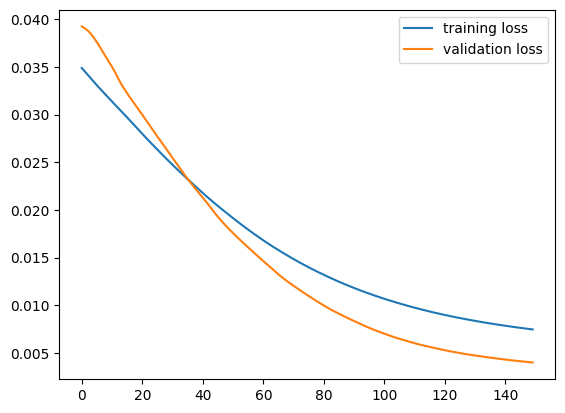

In [122]:
plt.plot(gru_hist.history['loss'], label='training loss')
plt.plot(gru_hist.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

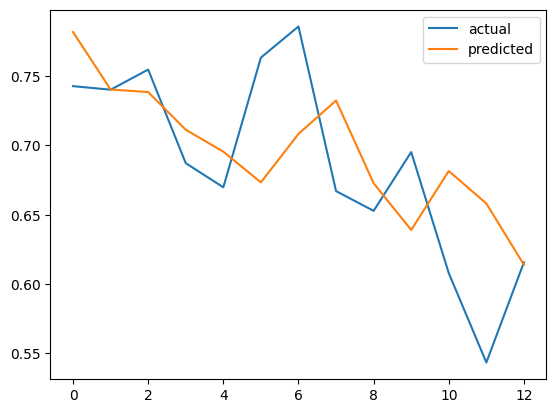

In [123]:
plt.plot(values, label='actual')
plt.plot(gru_predictions, label='predicted')
plt.legend()
plt.show()

### Model 2 Training

Train your second model on the training dataset.

**Instructions:**
- Fit the second model to the training data.
- Ensure to monitor the training process.

In [124]:
lstm_model = Sequential([
    LSTM(50, activation='tanh', return_sequences =True),
    LSTM(25, activation='tanh'),
    Dense(15, activation='relu'),
    Dense(1, activation='relu'),
])
lstm_model.summary()


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [125]:
lstm_model.compile(loss='mse', optimizer=Adam(learning_rate=0.0001), metrics=['mse'])

In [127]:
Early_lstm = EarlyStopping(monitor='val_loss', patience=20)

In [128]:
lstm_hist = lstm_model.fit(xy_train, epochs=200, validation_data=xy_val, callbacks=[Early_lstm])

Epoch 1/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - loss: 0.3522 - mse: 0.3522 - val_loss: 0.6742 - val_mse: 0.6742
Epoch 2/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.3453 - mse: 0.3453 - val_loss: 0.6548 - val_mse: 0.6548
Epoch 3/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3342 - mse: 0.3342 - val_loss: 0.6346 - val_mse: 0.6346
Epoch 4/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.3215 - mse: 0.3215 - val_loss: 0.6142 - val_mse: 0.6142
Epoch 5/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.3088 - mse: 0.3088 - val_loss: 0.5939 - val_mse: 0.5939
Epoch 6/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.2965 - mse: 0.2965 - val_loss: 0.5737 - val_mse: 0.5737
Epoch 7/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.2844 - mse: 0.2844 - val_loss: 0.5538 - val_mse: 0.5538
Epoch 8/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.2728 - mse: 0.2728 - val_loss: 0.5341 - val_mse: 0.5341
Epoch 9/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.2615 - mse: 

### Make 2 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [129]:
lstm_predictions = lstm_model.predict(features)
lstm_predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step


array([[0.7585976 ],
       [0.6921885 ],
       [0.7106077 ],
       [0.73860294],
       [0.7431252 ],
       [0.7311645 ],
       [0.7212452 ],
       [0.69949234],
       [0.64140886],
       [0.64600706],
       [0.6865712 ],
       [0.71279854],
       [0.7126751 ]], dtype=float32)

### Model 2 Evaluation

Evaluate the performance of your second model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [130]:
print('mean_absolute_error: ', mean_absolute_error(values, lstm_predictions))
print('mean_squared_error: ', mean_squared_error(values, lstm_predictions))
print('mean_absolute_error: ', np.sqrt(mean_absolute_error(values, lstm_predictions)))
print('mean_absolute_percentage_error: ', mean_absolute_percentage_error(values, lstm_predictions))

mean_absolute_error:  0.05906876247465856
mean_squared_error:  0.005052227559748366
mean_absolute_error:  0.24304066012636355
mean_absolute_percentage_error:  0.09148615429399841


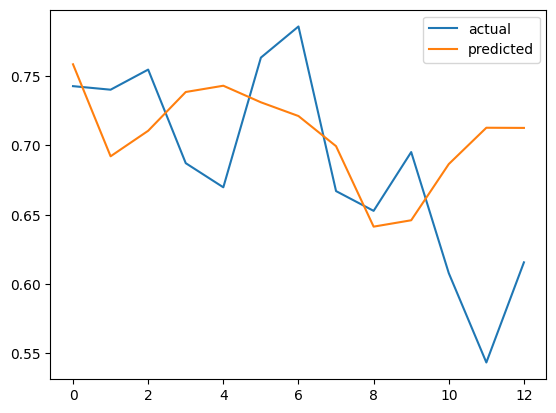

In [131]:
plt.plot(values, label='actual')
plt.plot(lstm_predictions, label='predicted')
plt.legend()
plt.show()

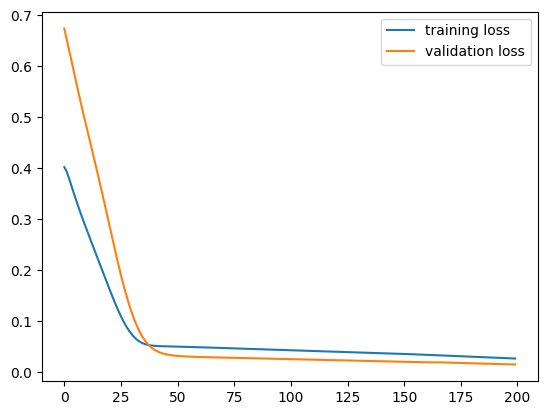

In [132]:
plt.plot(lstm_hist.history['loss'], label='training loss')
plt.plot(lstm_hist.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, handling missing values). How did these techniques help prepare the data for training the model?
2. **Feature Engineering**: Did you perform any feature engineering or transformations? Describe your decisions and how these new features (or transformed features) contributed to the forecasting model.
3. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the type of model, layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for time series forecasting?
4. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
5. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics (e.g., MAE, RMSE, MAPE)? How do they align with the objective of forecasting?
6. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
7. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?
8. **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. Consider using different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here:
1.
So first I implemented resampling in days  because the original visualization was too noisy and difficult to interpret.
Then I remove outliers using IQR and label encoding for categorical to process them into the model and I also implemented sorting to make them sortable all these preproccing help the visualization become more readable
2. yes to present the previous volume so the model can predeact i impleamnt shifting and calcualte the difrrancess and extracting coumns from the date to make predecation easier for model

3. as we took in lecutres tanh actvatoin was sutiable for time serise models and for the output relue scince its range... for the filters i traid sevral times and chose the best one result

4. for the epochs i implmented early stopping and put a 200 ephocs so that it could try its best but at the same time there is an early stopping to avoid overfitting

5. i choose them because they are the evaluating matrics we use in time serise

6. our model seemed to be preforming well by seeing the plots

7. no over fitting or under :)

